In [1]:
import pandas as pd

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Импортируем датасет из world bank databank (https://databank.worldbank.org/source/global-financial-inclusion/Type/TABLE/preview/on) 

In [2]:
df_all = pd.read_csv('World development indicators.csv')
df_all.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Kazakhstan,KAZ,"Population, total",SP.POP.TOTL,9319283,9639302,9959414,10277790,10590934,10897644,...,17288285,17542806,17794055,18037776,18276452,18513673,18755666,19191356,19634983,19900177
1,Kazakhstan,KAZ,Population growth (annual %),SP.POP.GROW,..,3.37630049543017,3.2669535162312,3.14670218463675,3.0013095765307,2.85482669470742,...,1.47267087305755,1.46148468519161,1.42204614032925,1.36038126908993,1.31452298457883,1.28960848954226,1.29863532544565,2.29640758923114,2.28528529025291,1.34158039345206
2,Kazakhstan,KAZ,Surface area (sq. km),AG.SRF.TOTL.K2,..,2724902,2724902,2724902,2724902,2724902,...,2724902,2724902,2724902,2724902,2724902,2724902,2724900,2724900,..,..
3,Kazakhstan,KAZ,Population density (people per sq. km of land ...,EN.POP.DNST,..,..,..,..,..,..,...,6.40378004963514,6.49805756195133,6.59112308775049,6.68140015557284,6.76980849724043,6.85767789013594,6.94731488683928,7.10869948512798,..,..
4,Kazakhstan,KAZ,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,..,..,4.3,4.3,5.3,5.2,5.2,..


## Меняем размерность данных

In [3]:
def reshape_data(df):
    df_long = df.melt(
        id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
        var_name="Year",
        value_name="Value"
    )
    
    df_long["Year"] = df_long["Year"].str.extract(r'(\d{4})')
    
    df_pivot = df_long.pivot_table(
        index=["Country Name", "Country Code", "Year"],
        columns="Series Name",
        values="Value",
        aggfunc="first"
    ).reset_index()
    
    df_pivot.columns.name = None
    return df_pivot

df_all_reshaped = reshape_data(df_all)

In [4]:
df_all_reshaped

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),...,"Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
0,Afghanistan,AFG,1960,138.876,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,AFG,1961,138.717,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.23918482345135
2,Afghanistan,AFG,1962,138.494,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.32209917624658
3,Afghanistan,AFG,1963,138.173,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.36650792012084
4,Afghanistan,AFG,1964,140.107,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.42708007382488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,97.354,9.81926160524559,34.5535430097879,86,..,..,..,...,..,97.4766143857125,..,..,390760,..,27.2147472925701,27,30.1426934674569,1.99235149035129
17020,Zimbabwe,ZWE,2020,96.18,8.77285875573664,40.0463245921697,..,..,..,..,...,..,97.3841623798408,..,..,390760,..,27.2147472925701,..,18.6954515188142,2.13042091541727
17021,Zimbabwe,ZWE,2021,94.312,8.84989924799123,40.0463245921697,..,..,..,..,...,..,96.0151477769296,..,..,390760,..,27.2147472925701,..,9.23289369767289,2.23472352659423
17022,Zimbabwe,ZWE,2022,92.566,7.19192216597415,..,..,..,..,..,...,..,95.789907037216,..,..,..,..,27.2147472925701,..,5.04388356801315,2.30843663497267


## Выведем ввп по странам за 2023 год для сравнительного анализа

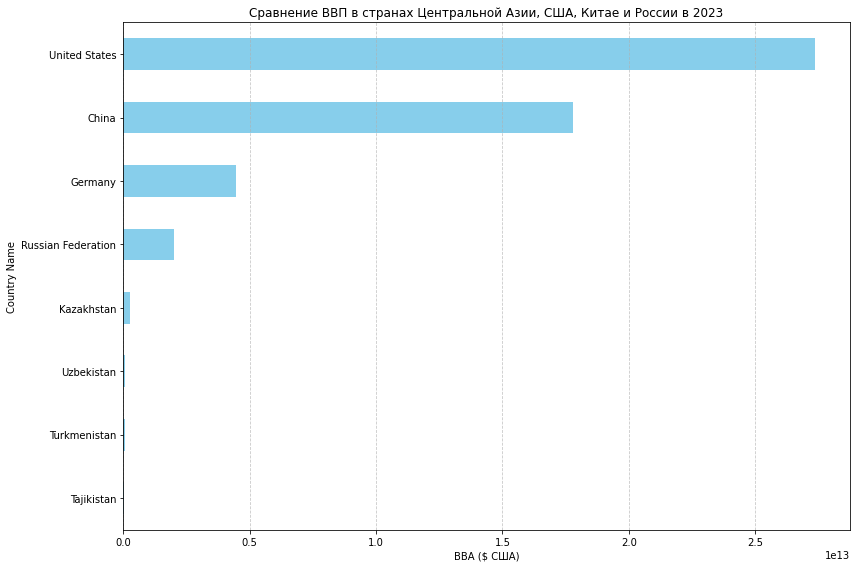

In [32]:
import matplotlib.pyplot as plt

countries = ['Kazakhstan', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'United States', 'Germany', 'Russian Federation', 'China']

df_2023 = df_filtered[(df_filtered['Country Name'].isin(countries)) & (df_filtered['Year'] == 2023)]

gdp_data = df_2023[['Country Name', 'GDP (current US$)']].set_index('Country Name')


plt.figure(figsize=(12, 8))
gdp_data['GDP (current US$)'].sort_values().plot(kind='barh', color='skyblue')


plt.xlabel('ВВА ($ США)')
plt.title('Сравнение ВВП в странах Центральной Азии, США, Китае и России в 2023')
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


# Подготовим данные для модели 

## Заменяем ".." на NaN для чистки

In [5]:
import numpy as np

df_all_reshaped.replace('..', np.nan, inplace=True)

## Удаляем строки, в которых нет значения ВВП (наш таргет) 

In [6]:
df_all_reshaped = df_all_reshaped.dropna(subset=["GDP (current US$)"])

df_all_reshaped

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),...,"Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
40,Afghanistan,AFG,2000,152.572,NaN,43.0159066808059,12.4,5.3,NaN,NaN,...,NaN,22.1629905700684,NaN,NaN,652860,NaN,NaN,NaN,NaN,1.86137729962901
41,Afghanistan,AFG,2001,150.863,NaN,43.0159066808059,NaN,NaN,NaN,NaN,...,NaN,22.9085903167725,0,14.4715099334717,652860,NaN,NaN,NaN,NaN,1.15383861520503
42,Afghanistan,AFG,2002,148.141,38.6278918638443,43.0159066808059,NaN,NaN,NaN,NaN,...,NaN,75.9597473144531,NaN,NaN,652860,NaN,NaN,NaN,NaN,6.86345297807244
43,Afghanistan,AFG,2003,143.37,37.4188554431481,43.0159066808059,14.3,10.3,NaN,NaN,...,NaN,96.5536804199219,0.544260025024414,14.078049659729,652860,NaN,NaN,NaN,NaN,7.95344768841497
44,Afghanistan,AFG,2004,138.827,29.7210671376957,43.0159066808059,NaN,NaN,NaN,NaN,...,NaN,106.252662658691,0.40582001209259,19.2631397247314,652860,NaN,NaN,9.5,NaN,4.58865325754718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,97.354,9.81926160524559,34.5535430097879,86,NaN,NaN,NaN,...,NaN,97.4766143857125,NaN,NaN,390760,NaN,27.2147472925701,27,30.1426934674569,1.99235149035129
17020,Zimbabwe,ZWE,2020,96.18,8.77285875573664,40.0463245921697,NaN,NaN,NaN,NaN,...,NaN,97.3841623798408,NaN,NaN,390760,NaN,27.2147472925701,NaN,18.6954515188142,2.13042091541727
17021,Zimbabwe,ZWE,2021,94.312,8.84989924799123,40.0463245921697,NaN,NaN,NaN,NaN,...,NaN,96.0151477769296,NaN,NaN,390760,NaN,27.2147472925701,NaN,9.23289369767289,2.23472352659423
17022,Zimbabwe,ZWE,2022,92.566,7.19192216597415,NaN,NaN,NaN,NaN,NaN,...,NaN,95.789907037216,NaN,NaN,NaN,NaN,27.2147472925701,NaN,5.04388356801315,2.30843663497267


Присваиваем численный тип данных для значений

In [7]:
df_all_reshaped = df_all_reshaped.apply(pd.to_numeric, errors='ignore')

C:\Users\user\AppData\Local\Temp\ipykernel_14308\4018284617.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_all_reshaped = df_all_reshaped.apply(pd.to_numeric, errors='ignore')


In [8]:
df_filtered = df_all_reshaped.copy()

In [28]:
df_filtered

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),...,"Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
40,Afghanistan,AFG,2000,152.572,NaN,43.015907,12.4,5.3,NaN,NaN,...,NaN,22.162991,NaN,NaN,652860.0,NaN,NaN,NaN,NaN,1.861377
41,Afghanistan,AFG,2001,150.863,NaN,43.015907,NaN,NaN,NaN,NaN,...,NaN,22.908590,0.00000,14.47151,652860.0,NaN,NaN,NaN,NaN,1.153839
42,Afghanistan,AFG,2002,148.141,38.627892,43.015907,NaN,NaN,NaN,NaN,...,NaN,75.959747,NaN,NaN,652860.0,NaN,NaN,NaN,NaN,6.863453
43,Afghanistan,AFG,2003,143.370,37.418855,43.015907,14.3,10.3,NaN,NaN,...,NaN,96.553680,0.54426,14.07805,652860.0,NaN,NaN,NaN,NaN,7.953448
44,Afghanistan,AFG,2004,138.827,29.721067,43.015907,NaN,NaN,NaN,NaN,...,NaN,106.252663,0.40582,19.26314,652860.0,NaN,NaN,9.5,NaN,4.588653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,97.354,9.819262,34.553543,86.0,NaN,NaN,NaN,...,NaN,97.476614,NaN,NaN,390760.0,NaN,27.214747,27.0,30.142693,1.992351
17020,Zimbabwe,ZWE,2020,96.180,8.772859,40.046325,NaN,NaN,NaN,NaN,...,NaN,97.384162,NaN,NaN,390760.0,NaN,27.214747,NaN,18.695452,2.130421
17021,Zimbabwe,ZWE,2021,94.312,8.849899,40.046325,NaN,NaN,NaN,NaN,...,NaN,96.015148,NaN,NaN,390760.0,NaN,27.214747,NaN,9.232894,2.234724
17022,Zimbabwe,ZWE,2022,92.566,7.191922,NaN,NaN,NaN,NaN,NaN,...,NaN,95.789907,NaN,NaN,NaN,NaN,27.214747,NaN,5.043884,2.308437


## Удаляем строки, в которых больше 50% пропущенных значений и далее - колонны, в которых более 50% пропущенных значений 

In [9]:
threshold_rows = int(0.5 * df_filtered.shape[1])  
threshold_columns = int(0.5 * df_filtered.shape[0])  

df_filtered_cleaned = df_filtered.dropna(thresh=threshold_rows).dropna(axis=1, thresh=threshold_columns)

df_filtered_cleaned

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),...,"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %)
40,Afghanistan,AFG,2000,152.572,NaN,NaN,7.534,1.700000e+05,12084.4,3.521418e+09,...,NaN,29.963329,1.443803,19542982,NaN,22.162991,NaN,NaN,652860.0,1.861377
41,Afghanistan,AFG,2001,150.863,NaN,NaN,7.446,6.800000e+05,12084.4,2.813572e+09,...,NaN,30.186640,0.742517,19688632,NaN,22.908590,0.00000,14.47151,652860.0,1.153839
42,Afghanistan,AFG,2002,148.141,38.627892,NaN,7.339,5.000000e+07,12084.4,3.825701e+09,...,NaN,32.197624,6.449321,21000256,NaN,75.959747,NaN,NaN,652860.0,6.863453
43,Afghanistan,AFG,2003,143.370,37.418855,NaN,7.220,5.780000e+07,12084.4,4.520947e+09,...,NaN,34.719547,7.541019,22645130,NaN,96.553680,0.54426,14.07805,652860.0,7.953448
44,Afghanistan,AFG,2004,138.827,29.721067,NaN,7.069,1.869000e+08,12084.4,5.224897e+09,...,NaN,36.112339,3.933178,23553551,NaN,106.252663,0.40582,19.26314,652860.0,4.588653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17018,Zimbabwe,ZWE,2018,98.507,7.319375,26.163973,3.659,7.178653e+08,175367.2,3.415607e+10,...,1.427703e+09,38.909614,2.020537,15052184,90.726250,97.879271,NaN,NaN,390760.0,1.933653
17019,Zimbabwe,ZWE,2019,97.354,9.819262,27.554156,3.599,2.495000e+08,174906.5,2.183223e+10,...,1.417012e+09,39.691374,1.989253,15354608,90.232155,97.476614,NaN,NaN,390760.0,1.992351
17020,Zimbabwe,ZWE,2020,96.180,8.772859,22.293063,3.545,1.503600e+08,174445.8,2.150970e+10,...,1.832039e+09,40.505793,2.031112,15669666,91.866905,97.384162,NaN,NaN,390760.0,2.130421
17021,Zimbabwe,ZWE,2021,94.312,8.849899,22.775241,3.491,2.500000e+08,173985.1,2.837124e+10,...,2.573627e+09,41.342960,2.045715,15993524,86.099625,96.015148,NaN,NaN,390760.0,2.234724


## Сделаем imputing, восполним оставшиеся NaN значения посредством поиска средних значений, группируя по странам

In [10]:
df_final = df_filtered_cleaned.copy().drop(['Country Code'], axis=1)

country_names = df_final['Country Name']

df_final_filled_for_mean = df_final.fillna(0)

columns_to_impute = df_final.columns.difference(['Country Name'])

df_final[columns_to_impute] = df_final_filled_for_mean.groupby('Country Name')[columns_to_impute].transform(lambda x: x.fillna(x.mean()))

df_final['Country Name'] = country_names

print(df_final.isna().sum())

df_final.head()

Country Name                                                                   0
Year                                                                           0
Adolescent fertility rate (births per 1,000 women ages 15-19)                  0
Agriculture, forestry, and fishing, value added (% of GDP)                     0
Exports of goods and services (% of GDP)                                       0
Fertility rate, total (births per woman)                                       0
Foreign direct investment, net inflows (BoP, current US$)                      0
Forest area (sq. km)                                                           0
GDP (current US$)                                                              0
GDP growth (annual %)                                                          0
GNI per capita, Atlas method (current US$)                                     0
GNI per capita, PPP (current international $)                                  0
GNI, Atlas method (current U

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),...,"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %)
40,Afghanistan,2000,152.572,0.000000,0.0,7.534,170000.0,12084.4,3.521418e+09,0.000000,...,0.0,29.963329,1.443803,19542982,0.0,22.162991,0.00000,0.00000,652860.0,1.861377
41,Afghanistan,2001,150.863,0.000000,0.0,7.446,680000.0,12084.4,2.813572e+09,-9.431974,...,0.0,30.186640,0.742517,19688632,0.0,22.908590,0.00000,14.47151,652860.0,1.153839
42,Afghanistan,2002,148.141,38.627892,0.0,7.339,50000000.0,12084.4,3.825701e+09,28.600001,...,0.0,32.197624,6.449321,21000256,0.0,75.959747,0.00000,0.00000,652860.0,6.863453
43,Afghanistan,2003,143.370,37.418855,0.0,7.220,57800000.0,12084.4,4.520947e+09,8.832278,...,0.0,34.719547,7.541019,22645130,0.0,96.553680,0.54426,14.07805,652860.0,7.953448
44,Afghanistan,2004,138.827,29.721067,0.0,7.069,186900000.0,12084.4,5.224897e+09,1.414118,...,0.0,36.112339,3.933178,23553551,0.0,106.252663,0.40582,19.26314,652860.0,4.588653


## Очистка датасета завершена, больше нет нулевых значений. Можно переходить к feature engineering (генерация признаков), поменяем навзания стран на численные значения используя target encoding  

In [11]:
df_final_encoded = df_final.copy()

country_gdp_mean = df_final_encoded.groupby('Country Name')['GDP (current US$)'].mean()

df_final_encoded['Country Name Encoded'] = df_final_encoded['Country Name'].map(country_gdp_mean)

df_final_encoded = df_final_encoded.drop('Country Name', axis=1)

print(df_final_encoded.isna().sum())

df_final_encoded.head()

Year                                                                           0
Adolescent fertility rate (births per 1,000 women ages 15-19)                  0
Agriculture, forestry, and fishing, value added (% of GDP)                     0
Exports of goods and services (% of GDP)                                       0
Fertility rate, total (births per woman)                                       0
Foreign direct investment, net inflows (BoP, current US$)                      0
Forest area (sq. km)                                                           0
GDP (current US$)                                                              0
GDP growth (annual %)                                                          0
GNI per capita, Atlas method (current US$)                                     0
GNI per capita, PPP (current international $)                                  0
GNI, Atlas method (current US$)                                                0
GNI, PPP (current internatio

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)",...,Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %),Country Name Encoded
40,2000,152.572,0.000000,0.0,7.534,170000.0,12084.4,3.521418e+09,0.000000,0.0,...,29.963329,1.443803,19542982,0.0,22.162991,0.00000,0.00000,652860.0,1.861377,1.309344e+10
41,2001,150.863,0.000000,0.0,7.446,680000.0,12084.4,2.813572e+09,-9.431974,0.0,...,30.186640,0.742517,19688632,0.0,22.908590,0.00000,14.47151,652860.0,1.153839,1.309344e+10
42,2002,148.141,38.627892,0.0,7.339,50000000.0,12084.4,3.825701e+09,28.600001,180.0,...,32.197624,6.449321,21000256,0.0,75.959747,0.00000,0.00000,652860.0,6.863453,1.309344e+10
43,2003,143.370,37.418855,0.0,7.220,57800000.0,12084.4,4.520947e+09,8.832278,190.0,...,34.719547,7.541019,22645130,0.0,96.553680,0.54426,14.07805,652860.0,7.953448,1.309344e+10
44,2004,138.827,29.721067,0.0,7.069,186900000.0,12084.4,5.224897e+09,1.414118,210.0,...,36.112339,3.933178,23553551,0.0,106.252663,0.40582,19.26314,652860.0,4.588653,1.309344e+10


In [12]:
df_final_encoded = df_final_encoded.apply(pd.to_numeric, errors='coerce')

print(df_final.isna().sum())

Country Name                                                                   0
Year                                                                           0
Adolescent fertility rate (births per 1,000 women ages 15-19)                  0
Agriculture, forestry, and fishing, value added (% of GDP)                     0
Exports of goods and services (% of GDP)                                       0
Fertility rate, total (births per woman)                                       0
Foreign direct investment, net inflows (BoP, current US$)                      0
Forest area (sq. km)                                                           0
GDP (current US$)                                                              0
GDP growth (annual %)                                                          0
GNI per capita, Atlas method (current US$)                                     0
GNI per capita, PPP (current international $)                                  0
GNI, Atlas method (current U

## Проведём нормализацию данных  используя Min-Max scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

X = df_final_encoded .drop(columns=['GDP (current US$)']) 
y = df_final_encoded ['GDP (current US$)']  

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_final_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

df_final_scaled.head()


,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)",...,Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %),Country Name Encoded,GDP (current US$)
0,0.603448,0.612139,0.000000,0.0,0.875436,0.103498,0.000287,0.294416,0.000000,0.005297,...,0.619464,0.002457,0.0,0.103242,0.000000,0.000000,0.004647,0.502441,0.000342,3.521418e+09
1,0.620690,0.605282,0.000000,0.0,0.865210,0.103498,0.000287,0.251058,0.000000,0.005035,...,0.604570,0.002475,0.0,0.106715,0.000000,0.074419,0.004647,0.490418,0.000342,2.813572e+09
2,0.637931,0.594361,0.488699,0.0,0.852777,0.103512,0.000287,0.425886,0.001337,0.006277,...,0.725778,0.002640,0.0,0.353842,0.000000,0.000000,0.004647,0.587436,0.000342,3.825701e+09
3,0.655172,0.575219,0.473403,0.0,0.838950,0.103514,0.000287,0.335016,0.001411,0.006408,...,0.748965,0.002847,0.0,0.449775,0.375536,0.072396,0.004647,0.605957,0.000342,4.520947e+09
4,0.672414,0.556992,0.376014,0.0,0.821404,0.103551,0.000287,0.300916,0.001560,0.006408,...,0.672337,0.002961,0.0,0.494955,0.280013,0.099060,0.004647,0.548782,0.000342,5.224897e+09


## Посмотрим на приоритетность каждого из параметров / переменных  (feature selection) используя random forest regressor

                                              Feature  Importance
10                    GNI, Atlas method (current US$)    0.978758
2   Agriculture, forestry, and fishing, value adde...    0.005174
11                 GNI, PPP (current international $)    0.004920
27                                  Population, total    0.004491
24       Personal remittances, received (current US$)    0.001942
23  Net official development assistance and offici...    0.000825
12                 Gross capital formation (% of GDP)    0.000488
25  Population density (people per sq. km of land ...    0.000435
32                              Surface area (sq. km)    0.000434
4            Fertility rate, total (births per woman)    0.000219
30  School enrollment, primary and secondary (gros...    0.000218
31             School enrollment, secondary (% gross)    0.000202
33                 Urban population growth (annual %)    0.000199
9       GNI per capita, PPP (current international $)    0.000142
28  Primar

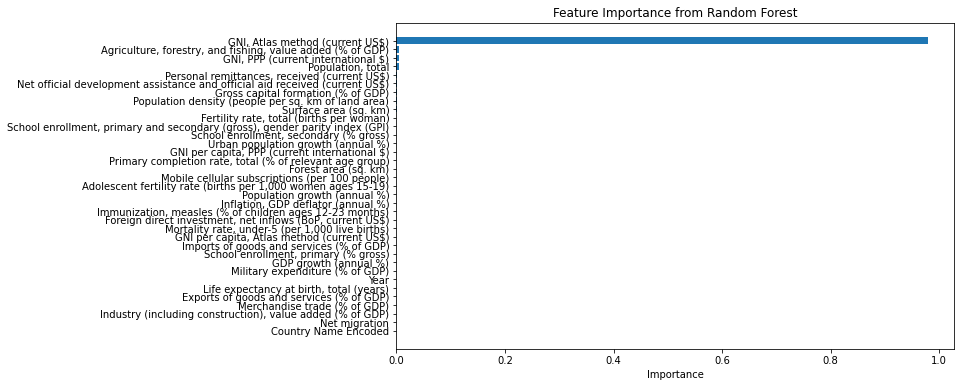

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df_final_scaled.drop('GDP (current US$)', axis=1) 
y = df_final_scaled['GDP (current US$)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

top_n = 10
top_features = feature_importance_df['Feature'][:top_n]

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)

mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)

print(f'RMSE with top {top_n} features: {rmse_selected}')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()


## Теперь можно перейти к тренировке моделей 

## Деление на тренировочные и валидационные (тестовые) данные

In [18]:
from sklearn.model_selection import train_test_split

X = df_final_scaled.drop(columns=['GDP (current US$)'])  
y = df_final_scaled['GDP (current US$)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_lr = linear_reg.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
sqrt_rmse_lr = np.sqrt(rmse_lr) / 1e6 # in millions

print(f"Linear Regression - R²: {r2_lr:.4f}")
print(f"Linear Regression - RMSE: {rmse_lr / 1e6:.2f} million")
print(f"Linear Regression - Square Root of RMSE: {sqrt_rmse_lr:.2f} million")


Linear Regression - R²: 0.9991
Linear Regression - RMSE: 172740.43 million
Linear Regression - Square Root of RMSE: 0.42 million


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
sqrt_rmse_rf = np.sqrt(rmse_rf) / 1e6  

print(f"Random Forest - R²: {r2_rf:.4f}")
print(f"Random Forest - RMSE: {rmse_rf / 1e6:.2f} million")
print(f"Random Forest - Square Root of RMSE: {sqrt_rmse_rf:.2f} million")


Random Forest - R²: 0.9983
Random Forest - RMSE: 236633.94 million
Random Forest - Square Root of RMSE: 0.49 million


In [21]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
sqrt_rmse_xgb = np.sqrt(rmse_xgb) / 1e6 

print(f"XGBoost - R²: {r2_xgb:.4f}")
print(f"XGBoost - RMSE: {rmse_xgb / 1e6:.2f} million")
print(f"XGBoost - Square Root of RMSE: {sqrt_rmse_xgb:.2f} million")


XGBoost - R²: 0.9961
XGBoost - RMSE: 353770.92 million
XGBoost - Square Root of RMSE: 0.59 million


In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
sqrt_rmse_knn = np.sqrt(rmse_knn) / 1e6  

print(f"KNN - R²: {r2_knn:.4f}")
print(f"KNN - RMSE: {rmse_knn / 1e6:.2f} million")
print(f"KNN - Square Root of RMSE: {sqrt_rmse_knn:.2f} million")


KNN - R²: 0.9815
KNN - RMSE: 772304.40 million
KNN - Square Root of RMSE: 0.88 million


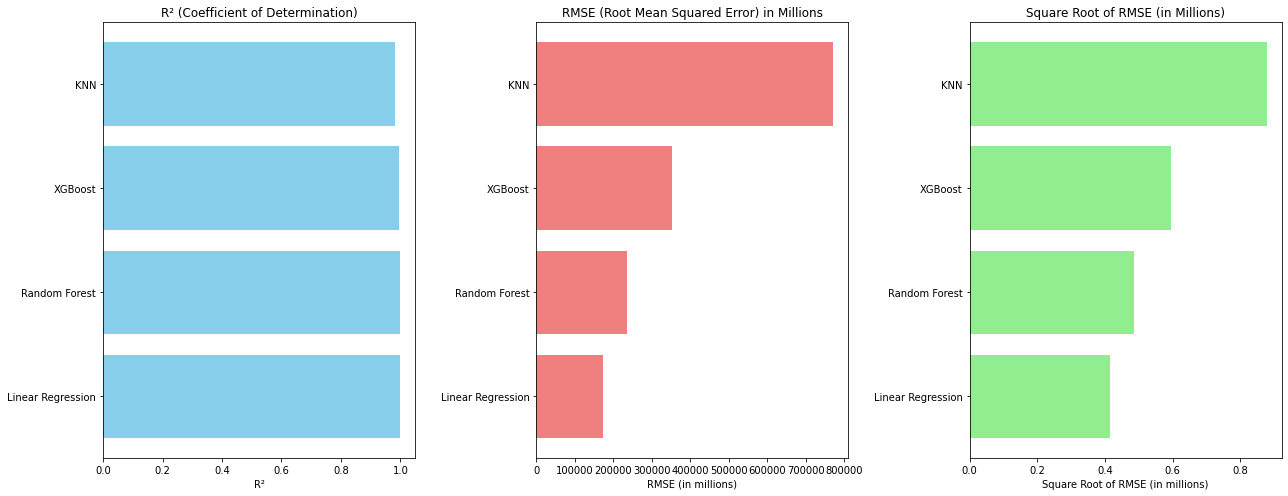

In [23]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'KNN'],
    'R²': [r2_lr, r2_rf, r2_xgb, r2_knn],
    'RMSE (in millions)': [rmse_lr / 1e6, rmse_rf / 1e6, rmse_xgb / 1e6, rmse_knn / 1e6],
    'Square Root of RMSE (in millions)': [sqrt_rmse_lr, sqrt_rmse_rf, sqrt_rmse_xgb, sqrt_rmse_knn]
})

fig, ax = plt.subplots(1, 3, figsize=(18, 7))

ax[0].barh(results['Model'], results['R²'], color='skyblue')
ax[0].set_title('R² (Coefficient of Determination)')
ax[0].set_xlabel('R²')

ax[1].barh(results['Model'], results['RMSE (in millions)'], color='lightcoral')
ax[1].set_title('RMSE (Root Mean Squared Error) in Millions')
ax[1].set_xlabel('RMSE (in millions)')

ax[2].barh(results['Model'], results['Square Root of RMSE (in millions)'], color='lightgreen')
ax[2].set_title('Square Root of RMSE (in Millions)')
ax[2].set_xlabel('Square Root of RMSE (in millions)')

plt.tight_layout()
plt.show()
